<a href="https://colab.research.google.com/github/CHANDRAPRASANNA/PRODIGY_TrackCode_TaskNumber/blob/main/PRODIGY_WD_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pandas seaborn matplotlib wordcloud plotly


     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Sentiment distribution:
 sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


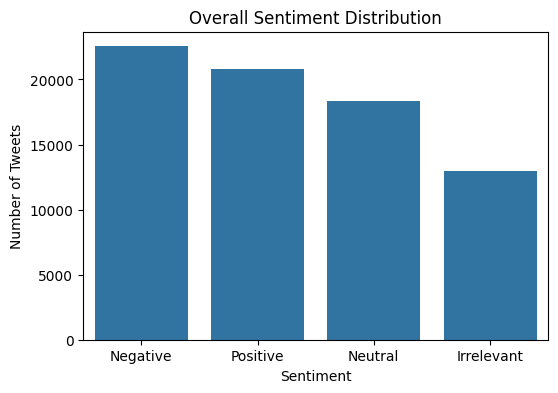

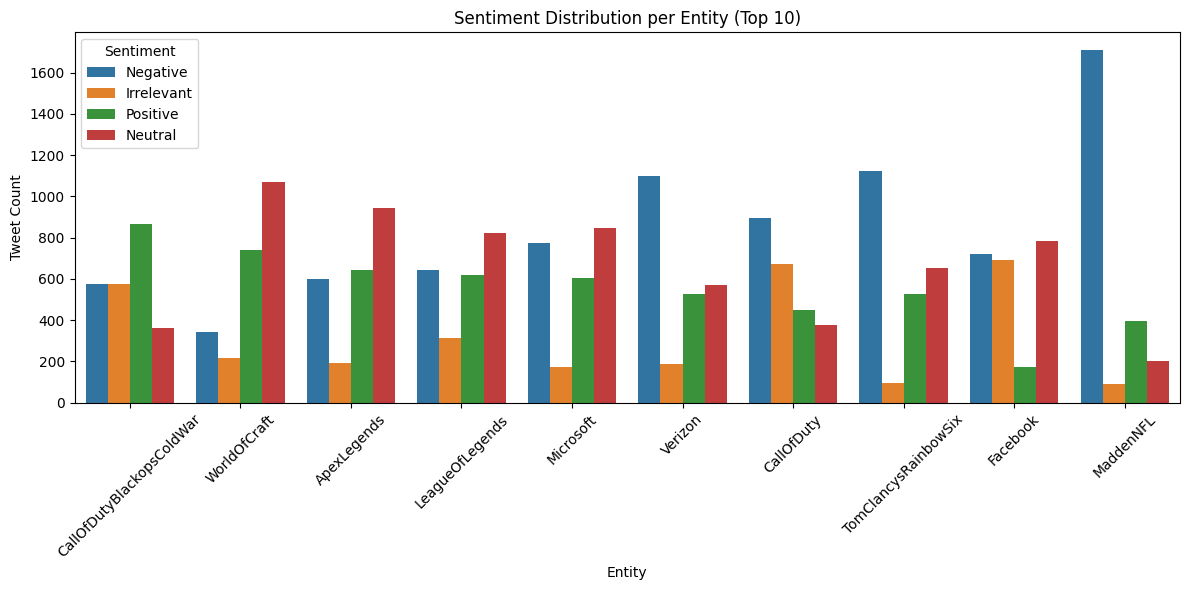

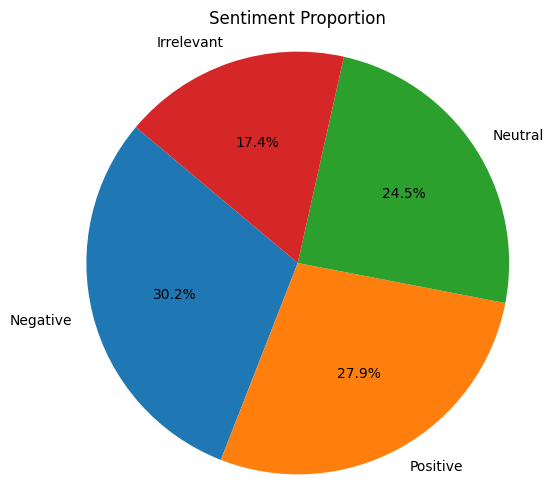

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/twitter_training.csv", header=None)
df.columns = ["id", "entity", "sentiment", "text"]

# Display basic info
print(df.head())
print("Sentiment distribution:\n", df["sentiment"].value_counts())

# --- 1. Sentiment Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

# --- 2. Sentiment per Entity (Top 10) ---
top_entities = df['entity'].value_counts().nlargest(10).index
df_top_entities = df[df['entity'].isin(top_entities)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_entities, x='entity', hue='sentiment')
plt.title("Sentiment Distribution per Entity (Top 10)")
plt.xticks(rotation=45)
plt.xlabel("Entity")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

# --- 3. WordCloud for Positive and Negative Tweets ---
def show_wordcloud(data, title):
    text = ' '.join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


# --- 4. Pie Chart for Sentiment Share ---
sentiment_share = df['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_share, labels=sentiment_share.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Proportion")
plt.axis('equal')
plt.show()

# --- 5. Interactive Plot with Plotly (Sentiment per Entity) ---
fig = px.histogram(df_top_entities, x="entity", color="sentiment",
                   barmode="group", title="Interactive Sentiment by Entity",
                   labels={"entity": "Entity", "sentiment": "Sentiment"})
fig.show()
